# From Here to There

In [9]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [10]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [11]:
import _pickle as cPickle

In [12]:
nyc_data = pd.read_csv("/data/bikeshare/data/unified/nyc.csv")
boston_data = pd.read_csv("/data/bikeshare/data/unified/boston.csv")
main_data = pd.read_csv("/data/bikeshare/data/unified/merged.csv")

In [13]:
nyc = {'name':'New York City', 'data':nyc_data, 'ref':'nyc'}
boston = {'name':'Boston', 'data':boston_data, 'ref':'bos'}
main = {'name':'All Data', 'data':main_data, 'ref':'all'}

## Usage by Station

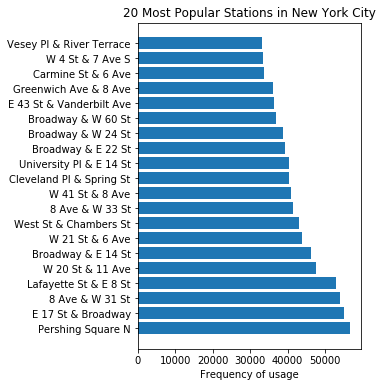

In [28]:
location = nyc
data = location['data']
counts = data.start_station.value_counts().head(20)
plt.barh(counts.index, counts)
plt.xlabel('Frequency of usage')
fig = plt.gcf()
fig.set_size_inches(4,6)
plt.title('20 Most Popular Stations in '+location['name'])
plt.savefig('../images/3/20_popular_'+location['ref']+'.png')
plt.show()

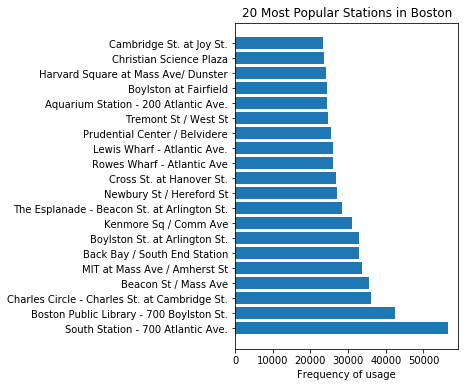

In [30]:
location = boston
data = location['data']
counts = data.start_station.value_counts().head(20)
plt.barh(counts.index, counts)
plt.xlabel('Frequency of usage')
fig = plt.gcf()
fig.set_size_inches(4,6)
plt.title('20 Most Popular Stations in '+location['name'])
plt.savefig('../images/3/20_popular_'+location['ref']+'.png')
plt.show()

## Interactive Chart

In [14]:
def plot_interactive(location):
    # n = 100000
    data = location['data']# .sample(n)
    # Remove trips to the same station
    diff_station = data[data['start_station'] != data['end_station']]
    # Find next stations
    trip_summaries = diff_station[['start_station','end_station','duration']].groupby(['start_station','end_station']).count().rename(columns={'duration':'count'}).reset_index()

    unique_stations = list(diff_station.start_station.unique())

    def plot_bar(station):
        next_count = trip_summaries[trip_summaries['start_station'] == station].sort_values('count', ascending=False).head(20)[['end_station','count']]
        # plot
        plt.barh(next_count['end_station'], next_count['count'])
        plt.title('Frequency of next location from '+station)
        plt.xlabel('Count')
        fig = plt.gcf()
        fig.set_size_inches(5,6)

    return interactive(plot_bar, station=unique_stations)

### New York City

In [15]:
plot_interactive(nyc)

interactive(children=(Dropdown(description='station', options=('W 11 St & 6 Ave', 'Cleveland Pl & Spring St', …

### Boston

In [16]:
plot_interactive(boston)

interactive(children=(Dropdown(description='station', options=('Cross St. at Hanover St.', 'Lewis Wharf - Atla…